# Homework2

Please upload to Moodle a .zip archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a requirements.txt file which lists all the packages that you have used for your homework, one package per line (e.g., pandas). This will allow us to install all required packages in one go, by using "pip install -r requirements.txt".

Please name your .zip archive using your full name and student id as follows - *Firstnme_Lastname_12345678_COMP47350_Homework2.zip*. 

For your Notebook, please split the code and explanations into many little cells so it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write. Feel free to revisit *tips_to_keep_your_ipython_notebook_readable_and_easy_to_debug.html* provided on Moodle.

Your code and analysis is like a story that awaits to be read, make it a nice story please!

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .pdf
    - .csv
    - .txt
    - .html
Please keep the whole code in a single notebook. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will be ignored and not considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Sunday, April 16, 2017, midnight.** 

## Exercises

This homework focuses on building and evaluating prediction models for a particular problem and dataset.
The problem and data come from the Amazon online shopping platform. Several sellers can sell the same product on Amazon. Based on the data provided by the seller to Amazon (seller reputation, product price, shipping details, etc) Amazon ranks seller offers from best to worst for a given product. This ranking is mostly influenced by the product price offer of the seller, but it can also be influenced by other features. We first need to understand which features are most indicative of a seller being ranked first by Amazon for a product. When the seller is ranked first for a product we say that the seller is the 'winner' among all the offers, because their offer is shown first when a user searches for a product on Amazon, which increases their chances of selling the product. Our goal is to work with the data to build and evaluate prediction models that capture the relationship between descriptive features and the target feature 'IsWinner'.

We use the same dataset from Homework1 (you can use your cleaned/prepared CSV or the raw dataset), a CSV file describing offers by given sellers for given products and a column which records whether an offer was a winner or not.

(1). [25] Data Understanding: Exploring relationships between feature pairs:
    - (1.1) [5] Print the correlations between the continuous features.
    - (1.2) [5] Plot the scatter plots of each pair of continuous descriptive feature and target feature.
    - (1.3) [5] Discuss what you observe from the scatter plots and correlations, e.g., which continuous features seem to be better at predicting the target feature. Choose a subset of continuous features you find promising. Justify your choices.
    - (1.4) [5] For each categorical feature, plot the pairwise interaction with the target feature (barplots or stacked barplots).
    - (1.5) [5] Discuss what knowledge you gain from plotting the interaction of descriptive categorical features and the target feature, e.g., which categorical features seem to be better at predicting the target feature. Choose a subset of categorical features you find promising. Justify your choices.
    
(2). [15] Predictive Modeling: Linear Regression  
    - (2.1) [5] Train a linear regression model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set.   
    - (2.2) [2.5] Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model (e.g., interpret the model).    
    - (2.3) [2.5] Retrain the model using only the subset of features found to be statistically significant. Evaluate the quality of the model on the training set.
    - (2.4) [5] Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Threshold the predicted target feature value at 0.5 to get the predicted class for each example. 

(3). [15] Predictive Modeling: Logistic Regression  
    - (3.1) [5] Train a logistic regression model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set.   
    - (3.2) [5] Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model (e.g., interpret the model).    
    - (3.3) [2.5] Retrain the model using only the subset of features found to be statistically significant. Evaluate the quality of the model on the training set.
    - (3.4) [2.5] Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example.
    
(4). [20] Predictive Modeling: Random Forest 
    - (4.1) [5] Train a random forest model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set.   
    - (4.2) [5] Print the features ranked by random forest importance. Discuss your findings and choose a subset of features you find promising.
    - (4.3) [5] Retrain the model using only the subset of features found to be promising. Evaluate the quality of the model on the training set.
    - (4.4) [5] Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example.
    
(5). [25] Evaluating Predictive Models
    - (5.1) [10] Split the dataset into 70% training and remaining 30% test. Train all models from the previous exercises using the new training set and evaluate their quality on the new test set. Print classification evaluation metrics for all models on the test set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1). Discuss how does evaluation on the test set compare to evaluation using the full data for training and also for testing.
    - (5.2) [15] Summarize and try to improve your results so far:
        - (5.2.1) [5] Which model performs best and is it more accurate than a simple (but useless) model that always predicts IsWinner=0? Justify your answers.
        - (5.2.2) [10] Discuss your understanding of the problem and predictive modeling results so far. Can you find any tricks to improve the best model so far (e.g., using feature significance, feature re-scaling, creating new features, combining models, or other knowledge)?

In [6]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
#for showing plots directly in the notebook
%matplotlib inline

In [7]:
df = pd.read_csv('C:/Users/pamel/Anaconda3/envs/COMP47350DA/Practicals/Data_Analytics_Homework2/amazon-offers-10k-samples-new2.csv', encoding = "ISO-8859-1")

In [8]:
#test that we have the data
df.head()
#utf-8 encoding throwing an error - have I made some unwanted change to the csv as the old file still reads fine? 
#using ISO-8859-1 introduces a new 'unnamed' column?

,Unnamed: 0,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
0,1,1,-4.885260e+18,2016-02-04T04:26:52.136Z,Ready To Ship - We are unable to ship to PO Bo...,1,0,107.35,95,4078,-1.789490e+18,0.00,48,72,CA,ON
1,2,0,-4.885260e+18,2016-02-04T04:26:52.136Z,.,1,0,100.46,98,478,5.452080e+18,6.99,24,48,CA,ON
2,3,0,-4.885260e+18,2016-02-04T04:26:52.136Z,Fast shipping in Canada.,1,0,99.24,95,4384,-2.572280e+18,11.67,24,48,CA,ON
3,4,0,-4.885260e+18,2016-02-04T04:26:52.136Z,NaN,0,0,109.48,94,105,-8.704030e+18,8.99,24,48,CA,ON
4,5,0,-4.885260e+18,2016-02-04T04:26:52.136Z,NaN,0,0,116.70,67,9,1.929050e+18,6.98,24,48,CA,AB


# Question 1. Data Understanding: Exploring Relationships Between Feature Pairs

## 1.1 Print the correlations between the continuous features

In [9]:
df[['SellerFeedbackRating', 'SellerFeedbackCount', 'ListingPrice', 'ShippingPrice', 'ShippingTime_minHours', 'ShippingTime_maxHours']].corr()

,SellerFeedbackRating,SellerFeedbackCount,ListingPrice,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours
SellerFeedbackRating,1.000000,0.105576,-0.037842,-0.005308,-0.163926,-0.176798
SellerFeedbackCount,0.105576,1.000000,-0.001166,-0.202074,0.295287,0.212978
ListingPrice,-0.037842,-0.001166,1.000000,0.215024,0.038674,0.032914
ShippingPrice,-0.005308,-0.202074,0.215024,1.000000,-0.016701,0.036349
ShippingTime_minHours,-0.163926,0.295287,0.038674,-0.016701,1.000000,0.973911
ShippingTime_maxHours,-0.176798,0.212978,0.032914,0.036349,0.973911,1.000000


## 1.2 Plot the scatter plots of each pair of continuous descriptive feature and target feature

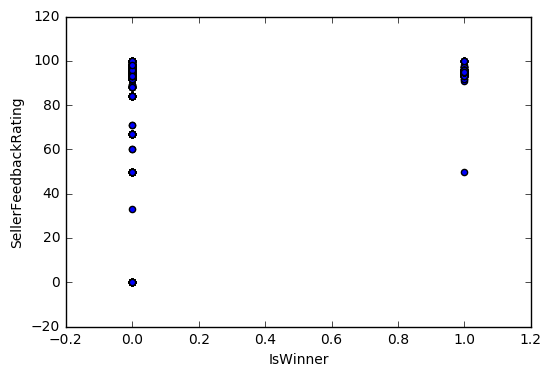

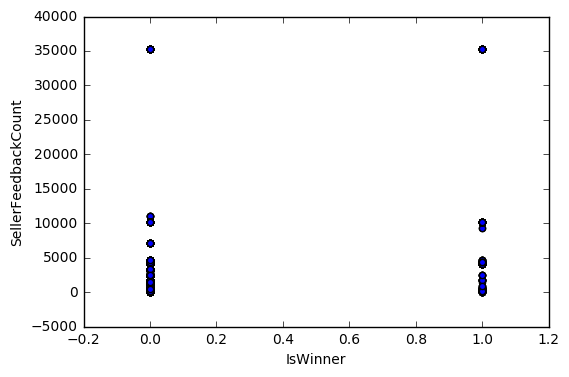

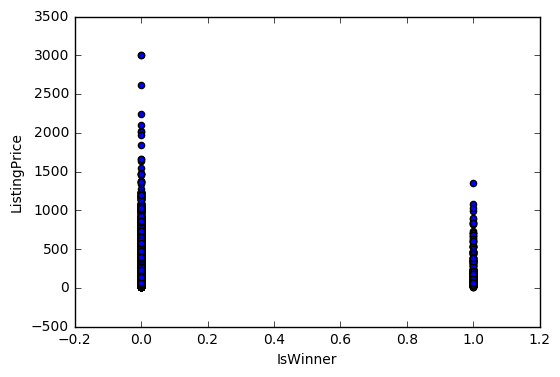

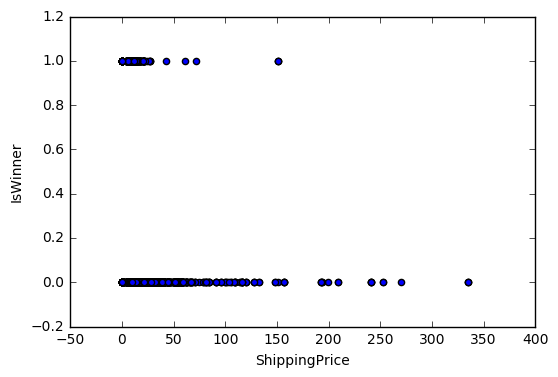

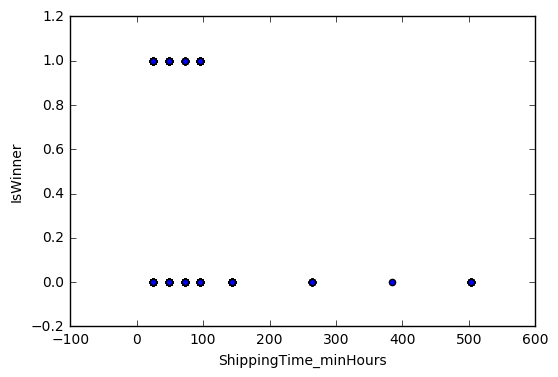

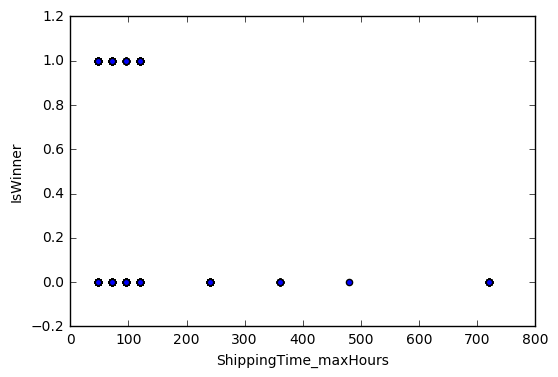

In [10]:
df.plot(kind='scatter', x='IsWinner', y='SellerFeedbackRating')
df.plot(kind='scatter', x='IsWinner', y='SellerFeedbackCount')
df.plot(kind='scatter', x='IsWinner', y='ListingPrice')
df.plot(kind='scatter', x='IsWinner', y='ShippingPrice')
df.plot(kind='scatter', x='IsWinner', y='ShippingTime_minHours')
df.plot(kind='scatter', x='IsWinner', y='ShippingTime_maxHours')

#negative values - do I need to go back at look at removing outliers? 

## 1.3 Discuss what you observe from the scatter plots and correlations, e.g., which continuous features seem to be better at predicting the target feature. Choose a subset of continuous features you find promising. Justify your choices. 

## 1.4 For each categorical feature, plot the pairwise interaction with the target feature (barplots or stacked barplots). 

## 1.5 Discuss what knowledge you gain from plotting the interaction of descriptive categorical features and the target feature, e.g., which categorical features seem to be better at predicting the target feature. Choose a subset of categorical features you find promising. Justify your choices. 

# Question 2: Predictive Modeling: Linear Regression

## 2.1 Train a linear regression model to predict the target feature IsWinner, using the descriptive features selected in exercise. 

## 2.2 Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model. 

## 2.3 Retrain the model using only the subset of features found to be statistically significant. Evaluate the quailty of the model on the training set. 

## 2.4 Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Threshold the predicted target feature value at 0.5 get the predicted class for each example. 

# Question 3: Predictive Modeling: Logistic Regression

## 3.1 Train a logistic regression model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set. 

## 3.2 Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model (e.g. interpret the model). 

## 3.3 Retrain the model using only the subset of features found to be statistically significant. Evaluate the quality of the model on the training set. 

## 3.4 Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example. 

# Question 4: Predictive Modeling: Random Forest

## 4.1 Train a random forest model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set. 

## 4.2 Print the features ranked by random forest importance. Discuss your findings and choose a subset of features you find promising. 

## 4.3 Retrain the model using only the subset of features found to be promising. Evaluate the quality of the model on the training set. 

## 4.4 Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example. 

# Question 5: Evaluating Predictive Models


## 5.1 Split the dataset into 70% training and remaining 30% test. Train all models from the previous exercises using the new training set and evaluate their quality on the new test set. Print classification evaluation metrics for all models on the test set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1). Discuss how does evaluation on the test set compare to evaluation using the full data for training and also for testing. 

## 5.2 Summarize and try to improve your results so far

## 5.2.1 Which model performs best and is it more accurate than a simple (but useless) model that always predicts IsWinner=0? Justify your answers. 

## 5.2.2 Discuss your understanding of the problem and predictive modeling results so far. Can you find  any tricks to improve the best model so far (e.g., using feature significance, feature rescaling, creating new features, combining models, or other knowledge)?